### Road Line Detection Pt 1 and Pt 2

In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [180]:
image = cv2.imread('./data/road3.jpeg')
#change color from BGR to RGB for matplotlib to plot
#cvtColor(src, code[, dst[, dstCn]])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [181]:
#find the edges
#cvtColor(src, code[, dst[, dstCn]])
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]])
canny_image = cv2.Canny(gray_image, 100, 200)
#we need to run this before masking the image or the edge detection will pick up the edges
#on the edges of the mask as well.

In [182]:
print(image.shape)

(540, 960, 3)


In [183]:
#define the vertices of the polygon that we want to keep
region_vertices = np.array([(110, 540), (440,320), (530, 320), (960, 540)], np.int32)

In [184]:
#function that will mask out areas we don't want.
def region_of_interest(img, vertices):
    #create 0's in the same size as the img
    mask = np.zeros_like(img)
    #set the masked area to white
    match_mask_color = 255
    #sets the area inside the vertices to all white pixels.
    #fillPoly(img, pts, color[, lineType[, shift[, offset]]])
    cv2.fillPoly(mask, vertices, match_mask_color)
    #crop out the masked part using the bitwise_and function.
    #keeps the area were the images are different which would be the white area.
    #bitwise_and(src1, src2[, dst[, mask]])
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

In [185]:
#now we will crop the image
cropped_image = region_of_interest(canny_image, [region_vertices])

In [186]:
#use HoughLinesP() to get the lines
#HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]])
lines = cv2.HoughLinesP(cropped_image, 
                        rho = 6, 
                        theta = np.pi/60, 
                        threshold = 160, 
                        lines = np.array([]),
                        minLineLength = 20, 
                        maxLineGap = 25)
#this returns all the line vectors that are detected

In [187]:
#this returns all the line vectors that are detected
lines

array([[[498, 320, 877, 538]],

       [[506, 322, 531, 336]],

       [[631, 390, 705, 432]],

       [[726, 442, 842, 508]],

       [[589, 367, 658, 406]],

       [[318, 430, 345, 410]],

       [[387, 382, 457, 331]],

       [[506, 323, 812, 500]],

       [[290, 463, 354, 412]],

       [[383, 381, 465, 321]],

       [[823, 496, 899, 539]],

       [[281, 459, 350, 409]]], dtype=int32)

In [203]:
#function that draws the lines
def draw_lines(img, lines):
    img = np.copy(img)
    #create blank image that matches the original image size
    blank_image = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype = np.uint8)
    #loop through line vectors
    for i in lines:
        #get the 4 coordinates for each line vector
        for x1,y1,x2,y2 in i:
            #draw the lines onto the blank image
            cv2.line(blank_image, (x1,y1), (x2,y2), (255,0,0), 4)
    
    #merge image with lines with the original image
    #addWeighted(src1, alpha, src2, beta, gamma[, dst[, dtype]])
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

In [204]:
#actually draw the lines on the original image using the draw_lines function create above
image_with_lines = draw_lines(image, lines)

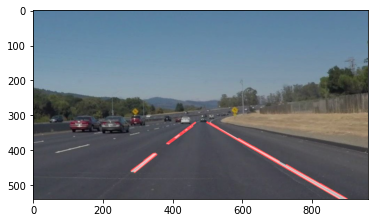

In [205]:
plt.imshow(image_with_lines)
plt.show()